# Energy and RMSE

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [4]:
x, sr = librosa.load('samples/simpleLoop.wav')

In [5]:
ipd.Audio(x, rate=sr)

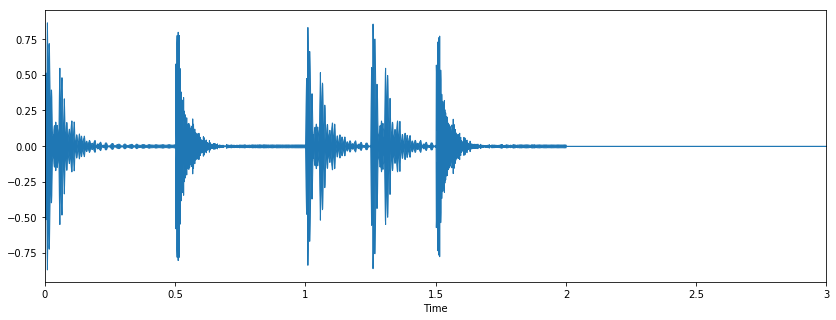

In [6]:
librosa.display.waveplot(x, sr=sr)

Compute the short-time energy using list compreshension:

In [8]:
hop_length = 256
frame_length = 1024

In [23]:
print x.shape

# real 
energy = np.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

print energy.shape
print energy

# to understand
energy_check = []
for i in range(0, len(x), hop_length):
    energy_check.insert(i, sum(abs(x[i:i+frame_length]**2)))

energy_check_ar = np.asarray(energy_check)
print energy_check_ar.shape
print energy_check_ar

(66150,)
(259,)
[  1.40769703e+02   9.06606130e+01   6.51427539e+01   6.13439879e+01
   6.04064338e+01   3.77212605e+01   1.88111663e+01   9.72296336e+00
   7.67971994e+00   5.03572153e+00   2.40941971e+00   2.11101228e+00
   1.20877331e+00   7.96421397e-01   5.69328457e-01   4.42854737e-01
   4.31884610e-01   2.72804850e-01   2.52570864e-01   2.00906463e-01
   1.79780088e-01   1.55109588e-01   1.43622597e-01   1.30522179e-01
   1.25280483e-01   1.19312710e-01   1.21472321e-01   1.13730667e-01
   1.15706591e-01   1.09959496e-01   1.13703130e-01   1.05008297e-01
   1.09455530e-01   1.01822955e-01   1.07006688e-01   1.02396959e-01
   1.04555599e-01   1.01788386e-01   1.06007566e-01   1.02184714e-01
   3.29507765e+01   6.37101543e+01   7.00967325e+01   7.24594734e+01
   4.12057222e+01   1.15278392e+01   5.89813879e+00   4.00038010e+00
   2.57740890e+00   1.70312089e+00   1.03434309e+00   6.24172938e-01
   4.94832875e-01   3.20629668e-01   2.52853028e-01   2.10467333e-01
   1.77134274e-01 

Compute the RMSE using librosa.feature.rmse:

In [13]:
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length)[0]

In [14]:
rmse.shape

(259,)

Plot both the energy and RMSE along with the waveform:

In [15]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

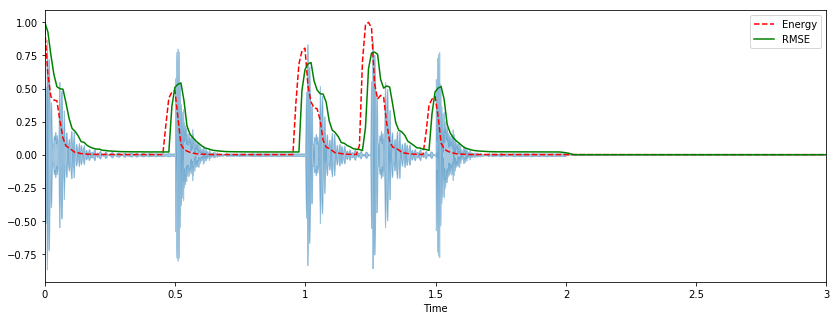

In [16]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--') # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='g') # normalized for visualization
plt.legend(('Energy', 'RMSE'))

# Short-Time Fourier Transform

In [13]:
x, sr = librosa.load('samples/simpleLoop.wav')
hop_length = 512
n_fft = 2048

print(x.shape)

X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
print (X.shape)

(66150,)
(1025, 130)


In [16]:
print(float(hop_length)/sr)
print(float(n_fft)/sr)

0.0232199546485
0.0928798185941


# Spectrogram

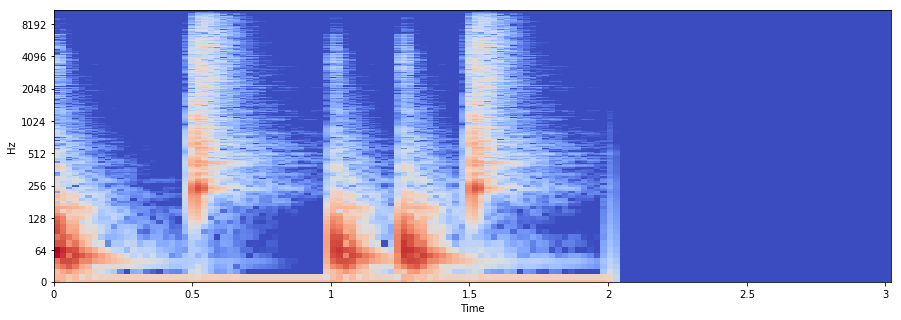

In [18]:
S = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')

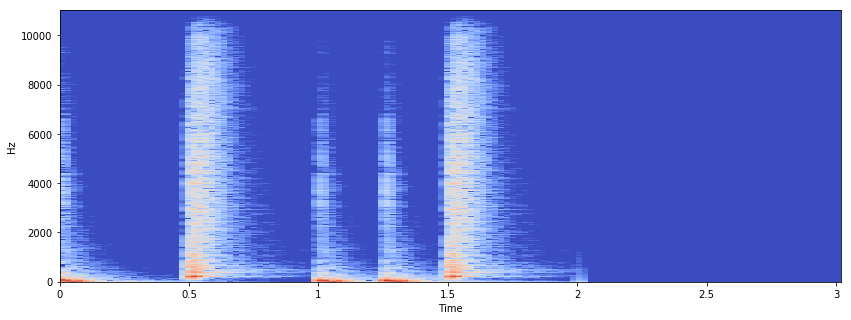

In [19]:
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

# Mel-spectrogram

In [30]:
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=4096, hop_length=256)
logS = librosa.amplitude_to_db(S)

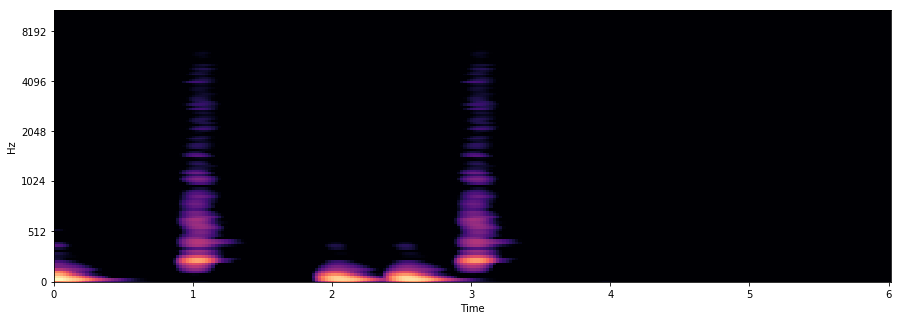

In [31]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

# librosa.cqt

In [34]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))

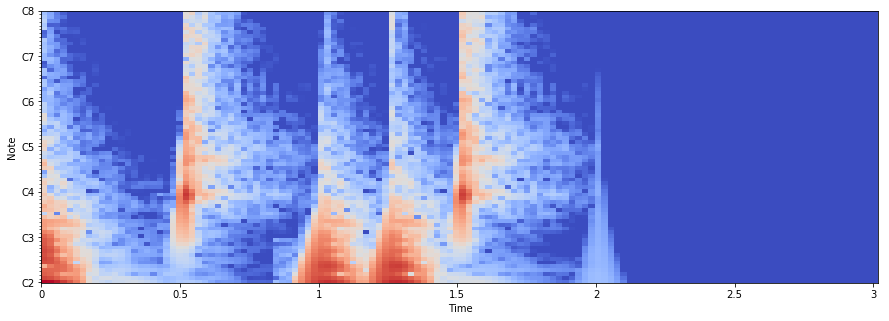

In [35]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')